## IMPORT NECESSARY PACKAGES

In [724]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## IMPORTING THE DATASET

In [726]:
data=pd.read_csv('Credit card transactions - Project - 2.csv')
data.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574


In [727]:
data.drop(columns=['index'],inplace=True)

## DATA CLEANING

In [729]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


We have no missing values in the given dataset

### CITY

In [732]:
data['City'].nunique()

986

We have 986 different unique cities in the given dataset

In [734]:
data['City'].unique()

array(['Delhi, India', 'Greater Mumbai, India', 'Bengaluru, India',
       'Ahmedabad, India', 'Markapur, India', 'Mavoor, India',
       'Sillod, India', 'Nainital, India', 'Laharpur, India',
       'Shenkottai, India', 'Neyveli (TS), India', 'Kapadvanj, India',
       'Arambagh, India', 'Thana Bhawan, India', 'Kancheepuram, India',
       'Sojat, India', 'Karjat, India', 'Mohali, India',
       'Narayanpet, India', 'Bhavnagar, India', 'Viluppuram, India',
       'Jamalpur, India', 'Udaipurwati, India', 'Palanpur, India',
       'Muzaffarpur, India', 'Taranagar, India', 'Ambikapur, India',
       'Mundi, India', 'Padrauna, India', 'Vijayapura, India',
       'Vrindavan, India', 'Byasanagar, India', 'Mudhol, India',
       'Sohna, India', 'Pune, India', 'Lakheri, India',
       'Jehanabad, India', 'Shegaon, India',
       'Shikarpur Bulandshahr, India', 'Dalli-Rajhara, India',
       'Mapusa, India', 'Uthamapalayam, India', 'Nasirabad, India',
       'Kapurthala, India', 'Anand, India'

In [735]:
type(data['City'][0])

str

### Date

In [737]:
type(data['Date'][0])

str

As we can see that the date is in string form, so we will first convert it into datetime format

In [739]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


### Card Type

In [741]:
data['Card Type'].nunique()

4

In [742]:
data['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

### Exp Type

In [744]:
data['Exp Type'].nunique()

6

In [745]:
data['Exp Type'].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

### Gender

In [747]:
data['Gender'].nunique()

2

In [748]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

### Amount

We have to check for the distribution of the amount

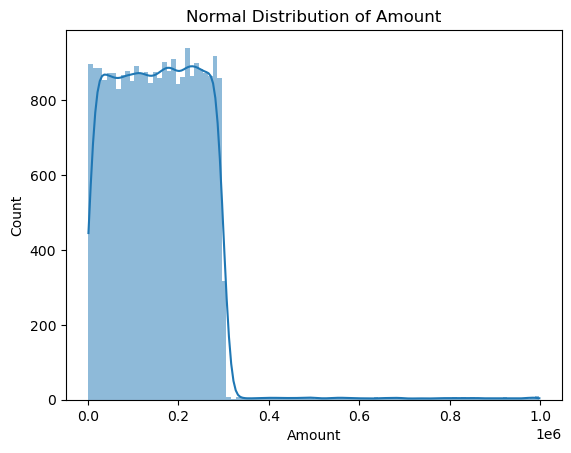

In [751]:
sns.histplot(data['Amount'], kde=True, linewidth=0)
plt.title('Normal Distribution of Amount')
plt.xlabel('Amount')
plt.show()


Thus it can clearly be seen that there are outliers in the data which is sort of expected with a data of such huge quantity

Our data now becomes

In [885]:
data.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Month
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014-10
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014-08
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014-08
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014-04
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015-05


### This finishes our data preprocessing part and with that we can now dive into the tasks given.

## Task1

In [755]:
totalAmount= city_spends['Amount'].sum()
totalAmount

4074833373

In [756]:
city_spends = data.groupby('City')['Amount'].sum().reset_index()
city_spends = city_spends.sort_values(by='Amount', ascending=False)
city_spends['Percentage Contribution'] = (city_spends['Amount'] / total_spends) * 100

In [757]:
city_spends

,City,Amount,Percentage Contribution
170,"Greater Mumbai, India",576751476,14.153989
71,"Bengaluru, India",572326739,14.045402
8,"Ahmedabad, India",567794310,13.934172
126,"Delhi, India",556929212,13.667533
267,"Kolkata, India",115466943,2.833660
...,...,...,...
106,"Changanassery, India",30074,0.000738
881,"Tirur, India",26094,0.000640
52,"Bahraich, India",24253,0.000595
317,"Mahbubnagar, India",15458,0.000379


In [758]:
top_5_cities = city_spends.head(5)
top_5_cities.reset_index(inplace=True)
top_5_cities.drop(columns=['index'],inplace=True)

### OUTPUT

In [760]:
top_5_cities

,City,Amount,Percentage Contribution
0,"Greater Mumbai, India",576751476,14.153989
1,"Bengaluru, India",572326739,14.045402
2,"Ahmedabad, India",567794310,13.934172
3,"Delhi, India",556929212,13.667533
4,"Kolkata, India",115466943,2.833660


### Save the csv file

In [762]:
top_5_cities.to_csv('Task1.csv')

### PIE CHART for better visualization

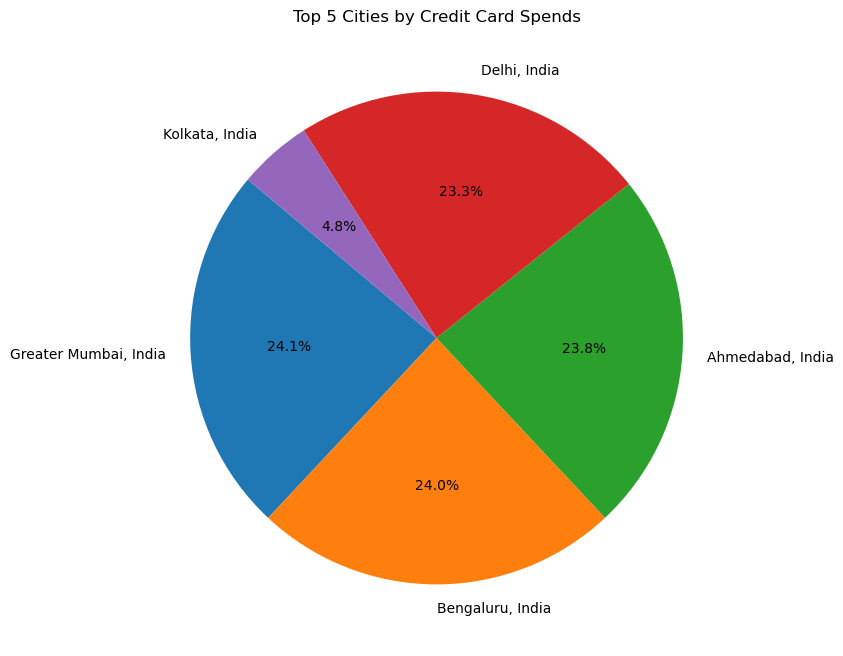

In [764]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_cities['Amount'], 
    labels=top_5_cities['City'], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Top 5 Cities by Credit Card Spends')
plt.show()

## TASK2

In [766]:
data['Month'] = data['Date'].dt.strftime('%Y-%m')

In [767]:
data.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Month
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014-10
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014-08
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014-08
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014-04
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015-05


In [768]:
monthly_spends = data.groupby(['Card Type', 'Month'])['Amount'].sum().reset_index()
monthly_spends = monthly_spends.sort_values(['Card Type', 'Amount'], ascending=[True, False])

In [769]:
monthly_spends

,Card Type,Month,Amount
15,Gold,2015-01,55455064
3,Gold,2014-01,54691140
11,Gold,2014-09,53155064
7,Gold,2014-05,52158856
6,Gold,2014-04,51578788
...,...,...,...
68,Silver,2014-06,51437691
69,Silver,2014-07,51377700
60,Silver,2013-10,51321598
79,Silver,2015-05,47478539


In [770]:
highest_spend_months = monthly_spends.groupby('Card Type').first().reset_index()

### OUTPUT

In [772]:
highest_spend_months

,Card Type,Month,Amount
0,Gold,2015-01,55455064
1,Platinum,2014-08,57936507
2,Signature,2013-12,58799522
3,Silver,2015-03,59723549


### Save the csv file

In [774]:
highest_spend_months.to_csv('Task2.csv')

### PIE CHART for better visualiztion

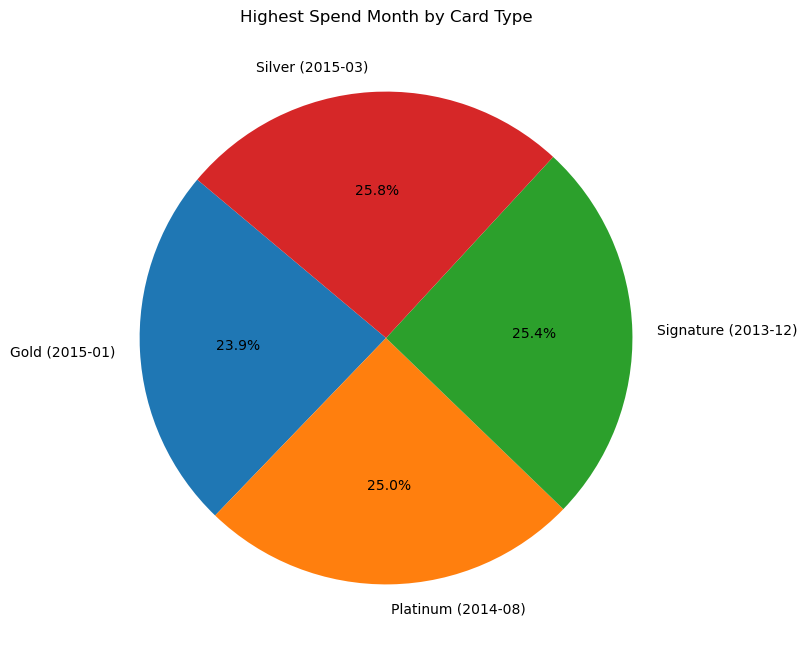

In [776]:
highest_spend_months['Label'] = highest_spend_months['Card Type'] + ' (' + highest_spend_months['Month'] + ')'
plt.figure(figsize=(8, 8))
plt.pie(
    highest_spend_months['Amount'], 
    labels=highest_spend_months['Label'], 
    autopct='%1.1f%%', 
    startangle=140
)

plt.title('Highest Spend Month by Card Type')
plt.show()

## TASK3

In [778]:
df = data.sort_values(by=['Card Type', 'Date'])
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

In [779]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Month
0,"Greater Mumbai, India",2013-10-04,Gold,Bills,F,990700,2013-10
1,"Delhi, India",2013-10-04,Gold,Food,M,281924,2013-10
2,"Delhi, India",2013-10-04,Gold,Grocery,M,125616,2013-10
3,"Ahmedabad, India",2013-10-04,Gold,Entertainment,F,78098,2013-10
4,"Bengaluru, India",2013-10-04,Gold,Fuel,F,236037,2013-10


In [780]:
df['Cumulative Amount'] = df.groupby('Card Type')['Amount'].cumsum()

In [781]:
result = df[df['Cumulative Amount'] >= 1000000]

In [782]:
result

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Cumulative Amount
1,"Delhi, India",2013-10-04,Gold,Food,M,281924,2013-10,1272624
2,"Delhi, India",2013-10-04,Gold,Grocery,M,125616,2013-10,1398240
3,"Ahmedabad, India",2013-10-04,Gold,Entertainment,F,78098,2013-10,1476338
4,"Bengaluru, India",2013-10-04,Gold,Fuel,F,236037,2013-10,1712375
5,"Greater Mumbai, India",2013-10-04,Gold,Entertainment,M,201942,2013-10,1914317
...,...,...,...,...,...,...,...,...
26047,"Ahmedabad, India",2015-05-26,Silver,Grocery,M,210509,2015-05,1068700658
26048,"Greater Mumbai, India",2015-05-26,Silver,Entertainment,M,180339,2015-05,1068880997
26049,"Ahmedabad, India",2015-05-26,Silver,Grocery,F,296653,2015-05,1069177650
26050,"Jaipur, India",2015-05-26,Silver,Fuel,F,292561,2015-05,1069470211


In [783]:
result = result.groupby('Card Type').first().reset_index()

### OUTPUT

In [785]:
result

,Card Type,City,Date,Exp Type,Gender,Amount,Month,Cumulative Amount
0,Gold,"Delhi, India",2013-10-04,Food,M,281924,2013-10,1272624
1,Platinum,"Ahmedabad, India",2013-10-05,Bills,F,612572,2013-10,1537482
2,Signature,"Delhi, India",2013-10-04,Bills,F,550782,2013-10,1285819
3,Silver,"Bengaluru, India",2013-10-04,Food,F,205179,2013-10,1115582


### SAVE THE csv file

In [787]:
result.to_csv('Task3.csv')

## TASK4

In [789]:
gold_data = data[data['Card Type'] == 'Gold']

In [790]:
gold_data.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Month
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014-10
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015-05
6,"Delhi, India",2015-02-24,Gold,Bills,F,143250,2015-02
12,"Greater Mumbai, India",2014-08-07,Gold,Bills,F,19226,2014-08
17,"Greater Mumbai, India",2015-03-30,Gold,Bills,F,986379,2015-03


In [791]:
gold_city_spends = gold_data.groupby('City')['Amount'].sum().reset_index()
gold_total_spend = gold_city_spends['Amount'].sum()
gold_city_spends['Percentage Spend'] = (gold_city_spends['Amount'] / gold_total_spend) * 100

In [792]:
gold_city_spends

,City,Amount,Percentage Spend
0,"Achalpur, India",679992,0.069067
1,"Adilabad, India",49020,0.004979
2,"Adityapur, India",486710,0.049435
3,"Adoni, India",630632,0.064053
4,"Adoor, India",6536,0.000664
...,...,...,...
761,"Yavatmal, India",417894,0.042446
762,"Yellandu, India",253950,0.025794
763,"Yemmiganur, India",135549,0.013768
764,"Yevla, India",97130,0.009866


In [793]:
city_with_lowest_spend = gold_city_spends.loc[gold_city_spends['Percentage Spend'].idxmin()]

### OUTPUT

In [795]:
city_with_lowest_spend

City                Dhamtari, India
Amount                         1416
Percentage Spend           0.000144
Name: 99, dtype: object

### Save the csv file

In [797]:
city_with_lowest_spend.to_csv('Task4.csv')

## TASK5

In [799]:
expense_sums = data.groupby(['City', 'Exp Type'])['Amount'].sum().reset_index()

In [800]:
expense_sums.head()

,City,Exp Type,Amount
0,"Achalpur, India",Bills,624645
1,"Achalpur, India",Entertainment,55347
2,"Achalpur, India",Fuel,138246
3,"Achalpur, India",Grocery,788403
4,"Adilabad, India",Bills,868039


In [801]:
highest_expense = expense_sums.loc[expense_sums.groupby('City')['Amount'].idxmax()]
lowest_expense = expense_sums.loc[expense_sums.groupby('City')['Amount'].idxmin()]
result = pd.merge(highest_expense, lowest_expense, on='City', suffixes=('_Highest', '_Lowest'))
result = result[['City', 'Exp Type_Highest', 'Exp Type_Lowest']]
result.columns = ['City', 'Highest_Expense_Type', 'Lowest_Expense_Type']

### OUTPUT

In [803]:
result

,City,Highest_Expense_Type,Lowest_Expense_Type
0,"Achalpur, India",Grocery,Entertainment
1,"Adilabad, India",Bills,Food
2,"Adityapur, India",Food,Grocery
3,"Adoni, India",Bills,Entertainment
4,"Adoor, India",Fuel,Bills
...,...,...,...
981,"Zaidpur, India",Food,Bills
982,"Zamania, India",Entertainment,Fuel
983,"Zira, India",Entertainment,Grocery
984,"Zirakpur, India",Fuel,Entertainment


### Save the csv file

In [805]:
result.to_csv('Task5.csv')

## TASK6

In [807]:
female_spends=data[data['Gender']=='F']
female_expense_sums = female_spends.groupby('Exp Type')['Amount'].sum().reset_index()

In [808]:
female_expense_sums

,Exp Type,Amount
0,Bills,580035469
1,Entertainment,358663333
2,Food,452817279
3,Fuel,392282421
4,Grocery,365646998
5,Travel,55865530


In [809]:
total_expense_sums = data.groupby('Exp Type')['Amount'].sum().reset_index()

In [810]:
total_expense_sums

,Exp Type,Amount
0,Bills,907072473
1,Entertainment,726437536
2,Food,824724009
3,Fuel,789135821
4,Grocery,718207923
5,Travel,109255611


In [811]:
merged_data = pd.merge(female_expense_sums, total_expense_sums, on='Exp Type', suffixes=('_Female', '_Total'))

In [812]:
merged_data

,Exp Type,Amount_Female,Amount_Total
0,Bills,580035469,907072473
1,Entertainment,358663333,726437536
2,Food,452817279,824724009
3,Fuel,392282421,789135821
4,Grocery,365646998,718207923
5,Travel,55865530,109255611


In [813]:
merged_data['Percentage Contribution'] = (merged_data['Amount_Female'] / merged_data['Amount_Total']) * 100
result = merged_data[['Exp Type', 'Percentage Contribution']]

### OUTPUT

In [815]:
result

,Exp Type,Percentage Contribution
0,Bills,63.945879
1,Entertainment,49.372908
2,Food,54.905311
3,Fuel,49.710381
4,Grocery,50.911023
5,Travel,51.132870


### Save the csv file

In [817]:
result.to_csv('Task6.csv')

## TASK7

In [887]:
filtered_data = data[data['Month'].isin(['2013-12', '2014-01'])]

In [889]:
filtered_data

,City,Date,Card Type,Exp Type,Gender,Amount,Month
11,"Greater Mumbai, India",2013-12-07,Signature,Bills,F,278036,2013-12
36,"Ahmedabad, India",2014-01-01,Signature,Bills,F,255577,2014-01
46,"Ahmedabad, India",2013-12-10,Gold,Bills,F,892016,2013-12
52,"Ahmedabad, India",2013-12-21,Signature,Bills,F,402300,2013-12
53,"Delhi, India",2013-12-07,Signature,Bills,F,733125,2013-12
...,...,...,...,...,...,...,...
25949,"Lucknow, India",2014-01-28,Platinum,Travel,F,57507,2014-01
26012,"Hyderabad, India",2013-12-30,Gold,Travel,M,69498,2013-12
26015,"Jaipur, India",2013-12-25,Signature,Travel,F,124630,2013-12
26019,"Surat, India",2014-01-31,Signature,Travel,M,208779,2014-01


In [893]:
monthly_sums = filtered_data.groupby(['Month', 'Card Type', 'Exp Type'])['Amount'].sum().reset_index()

In [895]:
monthly_sums

,Month,Card Type,Exp Type,Amount
0,2013-12,Gold,Bills,10289023
1,2013-12,Gold,Entertainment,8521114
2,2013-12,Gold,Food,9573474
3,2013-12,Gold,Fuel,9570035
4,2013-12,Gold,Grocery,8910512
5,2013-12,Gold,Travel,1113534
6,2013-12,Platinum,Bills,11134282
7,2013-12,Platinum,Entertainment,9442901
8,2013-12,Platinum,Food,12060595
9,2013-12,Platinum,Fuel,9940343


In [903]:
pivot_data = monthly_sums.pivot_table(index=['Card Type', 'Exp Type'], columns='Month', values='Amount', fill_value=0).reset_index()
pivot_data['Growth'] = pivot_data['2014-01'] - pivot_data['2013-12']

In [905]:
pivot_data

Month,Card Type,Exp Type,2013-12,2014-01,Growth
0,Gold,Bills,10289023.0,11137964.0,848941.0
1,Gold,Entertainment,8521114.0,9940137.0,1419023.0
2,Gold,Food,9573474.0,11511990.0,1938516.0
3,Gold,Fuel,9570035.0,12281691.0,2711656.0
4,Gold,Grocery,8910512.0,7726804.0,-1183708.0
5,Gold,Travel,1113534.0,2092554.0,979020.0
6,Platinum,Bills,11134282.0,12138233.0,1003951.0
7,Platinum,Entertainment,9442901.0,9303489.0,-139412.0
8,Platinum,Food,12060595.0,10090531.0,-1970064.0
9,Platinum,Fuel,9940343.0,10698936.0,758593.0


In [909]:
max_growth = pivot_data.loc[pivot_data['Growth'].idxmax()]

### OUTPUT

In [911]:
max_growth

Month
Card Type      Platinum
Exp Type        Grocery
2013-12       7757562.0
2014-01      12256343.0
Growth        4498781.0
Name: 10, dtype: object

### Save the csv file

In [915]:
max_growth.to_csv('Task7.csv')

## TASK8

In [920]:
weekend_df = data[data['Date'].dt.dayofweek >= 5]

In [922]:
weekend_df

,City,Date,Card Type,Exp Type,Gender,Amount,Month
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014-04
10,"Delhi, India",2014-06-22,Platinum,Bills,F,280061,2014-06
11,"Greater Mumbai, India",2013-12-07,Signature,Bills,F,278036,2013-12
13,"Delhi, India",2014-04-27,Signature,Bills,F,254359,2014-04
16,"Greater Mumbai, India",2014-06-14,Signature,Bills,F,421878,2014-06
...,...,...,...,...,...,...,...
26041,"Chennai, India",2013-12-08,Signature,Travel,M,207941,2013-12
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,2014-06
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,2014-08
26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174,2014-09


In [924]:
weekend_summary = weekend_df.groupby('City').agg(
    total_spend=('Amount', 'sum'),
    total_transactions=('Amount', 'count')
).reset_index()
weekend_summary['Spend_to_Transaction_Ratio'] = weekend_summary['total_spend'] / weekend_summary['total_transactions']
max_ratio_city = weekend_summary.loc[weekend_summary['Spend_to_Transaction_Ratio'].idxmax()]

In [928]:
weekend_summary

,City,total_spend,total_transactions,Spend_to_Transaction_Ratio
0,"Achalpur, India",348051,2,174025.500000
1,"Adilabad, India",585977,3,195325.666667
2,"Adityapur, India",227532,2,113766.000000
3,"Adoni, India",718170,4,179542.500000
4,"Adoor, India",388364,3,129454.666667
...,...,...,...,...
802,"Yevla, India",260537,2,130268.500000
803,"Zaidpur, India",17420,1,17420.000000
804,"Zamania, India",715258,4,178814.500000
805,"Zirakpur, India",84925,1,84925.000000


### OUTPUT

In [931]:
max_ratio_city

City                          Sonepur, India
total_spend                           299905
total_transactions                         1
Spend_to_Transaction_Ratio          299905.0
Name: 657, dtype: object

### Save the csv file

In [934]:
max_ratio_city.to_csv('Task8.csv')

## TASK9

In [937]:
data = data.sort_values(by=['City', 'Date'])

In [939]:
data

,City,Date,Card Type,Exp Type,Gender,Amount,Month
19373,"Achalpur, India",2013-12-06,Silver,Grocery,F,201032,2013-12
17041,"Achalpur, India",2014-02-06,Platinum,Grocery,F,178612,2014-02
18871,"Achalpur, India",2014-04-19,Signature,Fuel,M,138246,2014-04
15604,"Achalpur, India",2014-05-29,Gold,Entertainment,F,55347,2014-05
18206,"Achalpur, India",2014-05-30,Signature,Grocery,F,216180,2014-05
...,...,...,...,...,...,...,...
14567,"Zirakpur, India",2014-12-08,Platinum,Food,M,175566,2014-12
17059,"Zirakpur, India",2015-04-08,Platinum,Fuel,F,289172,2015-04
15530,"Zunheboto, India",2013-11-04,Signature,Bills,M,89271,2013-11
18987,"Zunheboto, India",2014-03-29,Silver,Grocery,M,298567,2014-03


In [952]:
def days_to_500th_transaction(city_df):
    if len(city_df) >= 500:
        first_date = city_df['Date'].iloc[0]
        transaction_500_date = city_df['Date'].iloc[499]
        days_diff = (transaction_500_date - first_date).days
        return days_diff
    else:
        return None

In [964]:
df_500th = data.groupby('City').apply(days_to_500th_transaction).reset_index(name='Days_to_500th')
df_500th = df_500th.dropna()

In [966]:
df_500th

,City,Days_to_500th
8,"Ahmedabad, India",86.0
71,"Bengaluru, India",81.0
109,"Chennai, India",380.0
126,"Delhi, India",90.0
170,"Greater Mumbai, India",85.0
193,"Hyderabad, India",384.0
203,"Jaipur, India",401.0
237,"Kanpur, India",395.0
267,"Kolkata, India",389.0
300,"Lucknow, India",390.0


In [968]:
min_days_city = df_500th.loc[df_500th['Days_to_500th'].idxmin()]

### OUTPUT

In [970]:
min_days_city

City             Bengaluru, India
Days_to_500th                81.0
Name: 71, dtype: object

### Save the csv file

In [976]:
min_days_city.to_csv('Task9.csv')